# Spendesk

## Step 1 - Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

data_path = "/Users/qxzjy/vscworkspace/dse-ft-100/python_module/data/"

## Step 2 - Import Dataset

In [14]:
spendesk_df = pd.read_csv(data_path + "spendesk_survey.csv")
spendesk_df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after
0,11,75
1,13,72
2,38,15
3,28,34
4,39,17


## Step 3 - EDA

[Text(0, 0, '65.7313'), Text(0, 0, '41.0267')]

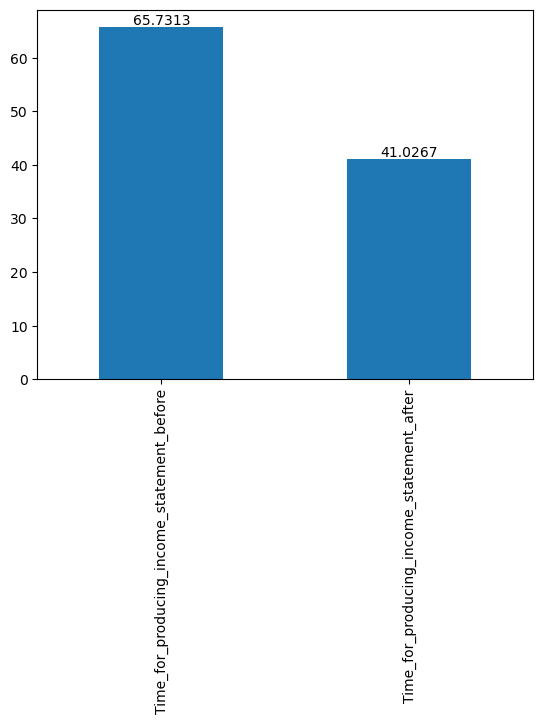

In [15]:
axes = spendesk_df.mean().plot(kind="bar")

# We display the mean directly on the bar plot
axes.bar_label(axes.containers[0])

In [ ]:
average_productivity_boost = (spendesk_df.Time_for_producing_income_statement_before.mean() - spendesk_df.Time_for_producing_income_statement_after.mean()) / spendesk_df.Time_for_producing_income_statement_before.mean()
# average_productivity_boost = (spendesk_df.mean()[0] - spendesk_df.mean()[1])/spendesk_df.mean()[0]
print("Average productivity boost (rounded) : {} %".format(np.round(average_productivity_boost*100)))

Average boost (rounded) : 38.0 %


In [ ]:
spendesk_df["time_difference"] = spendesk_df.Time_for_producing_income_statement_before - spendesk_df.Time_for_producing_income_statement_after
spendesk_df.head()

24.704666666666668

## Step 4 - Define hypothesises

H<sub>0</sub> : AVERAGE_BOOST >= 26

H<sub>1</sub> : AVERAGE_BOOST < 26

We want to know if customers save at least 26 days using Spendesk

## Step 5 - Calculate Z-score

In [21]:
# Z = (X - mu) / sigma / n
# -> X = mean
# -> mu = mean H1
# -> sigma = standard deviation
# -> n = sample size
mean = spendesk_df.time_difference.mean()
std = spendesk_df.time_difference.std()
mean_h1 = 26
sample_size = len(spendesk_df)

print(f"Average : {mean} | Standard deviation {std} | Average HO : {mean_h1}")

calculated_z_score = (mean - mean_h1) / (std / np.sqrt(sample_size))
print(f"Z-Score : {calculated_z_score}")

Average : 24.704666666666668 | Standard deviation 37.97125213739304 | Average HO : 26
Z-Score : -1.321211217800986


## Step 6 - Set α

In [22]:
alpha = 0.10
print(f"Confidence level (alpha) = {alpha}")

Confidence level (alpha) = 0.1


## Step 7 - Compare p-value to α

In [24]:
# Using ztest function from the statsmodels.stats.weightstat library
z_score, p_value = ztest(spendesk_df.time_difference, alternative='smaller', value=mean_h1)

print("Z_score : {}".format(z_score))
print("p-value : {}".format(p_value))

if p_value < alpha:
    print(f"Null hypothesis H0 rejected")
else:
    print("Null hypothesis H0 not rejected")

Z_score : -1.3212112178009856
p-value : 0.09321547347727516
Null hypothesis H0 rejected


## Step 8 (Optional) - Visualize probability

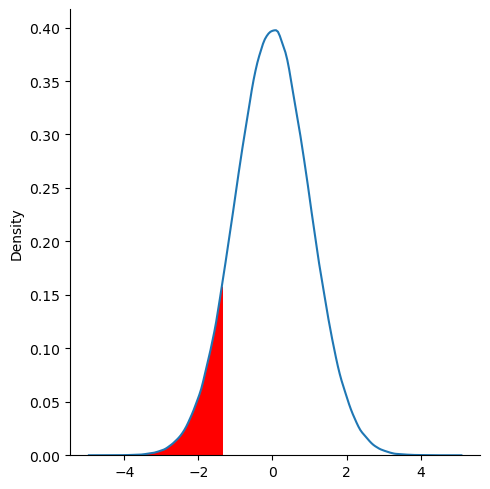

In [25]:
# Distplot from seaborn gives us a distribution from what is inside the parenthesis
# => Dispolot is deprecated, we're going to use Displot instead
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
# => Deprecated attribute, we're using kind="kde" which is the same as a kdeplot(kernel density estimation)
ax = sns.displot(np.random.normal(0, 1, size=1000000), kind="kde") 

# => Since Displot isn't working like Distplot, we need to access the matplotlib axes differently
axes = ax.axes[0, 0]

# This is a mask that will let us filter only the values beyond z-score
mask = axes.lines[0].get_xydata()[:, 0] < z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = axes.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = axes.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
axes.fill_between(x_area_under_curve, y_area_under_curve, color="red")

plt.show()